In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# loading the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# top 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# getting the features into X and labels into y
X = df.loc[:, ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
               'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

In [5]:
# taking all the continuous features into df_continuous dataframe
df_continuous = df.loc[:, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

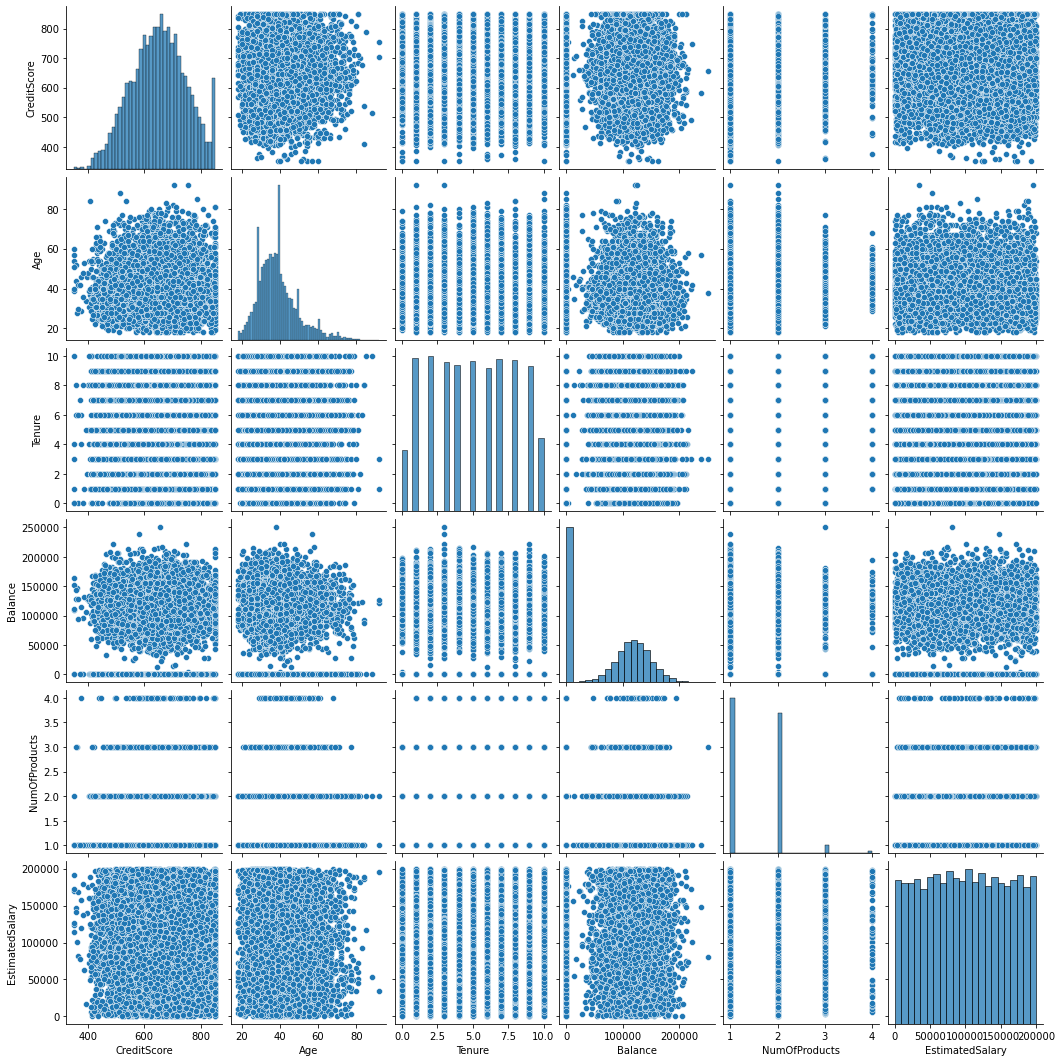

In [6]:
# pairplot of the continuous features
sns.pairplot(df_continuous)

<AxesSubplot:>

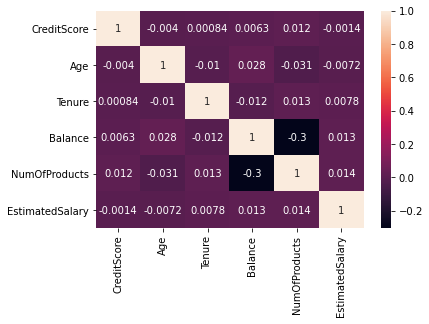

In [7]:
# pairwise heatmap of inter-feature correlation
sns.heatmap(df_continuous.corr(), annot = True)

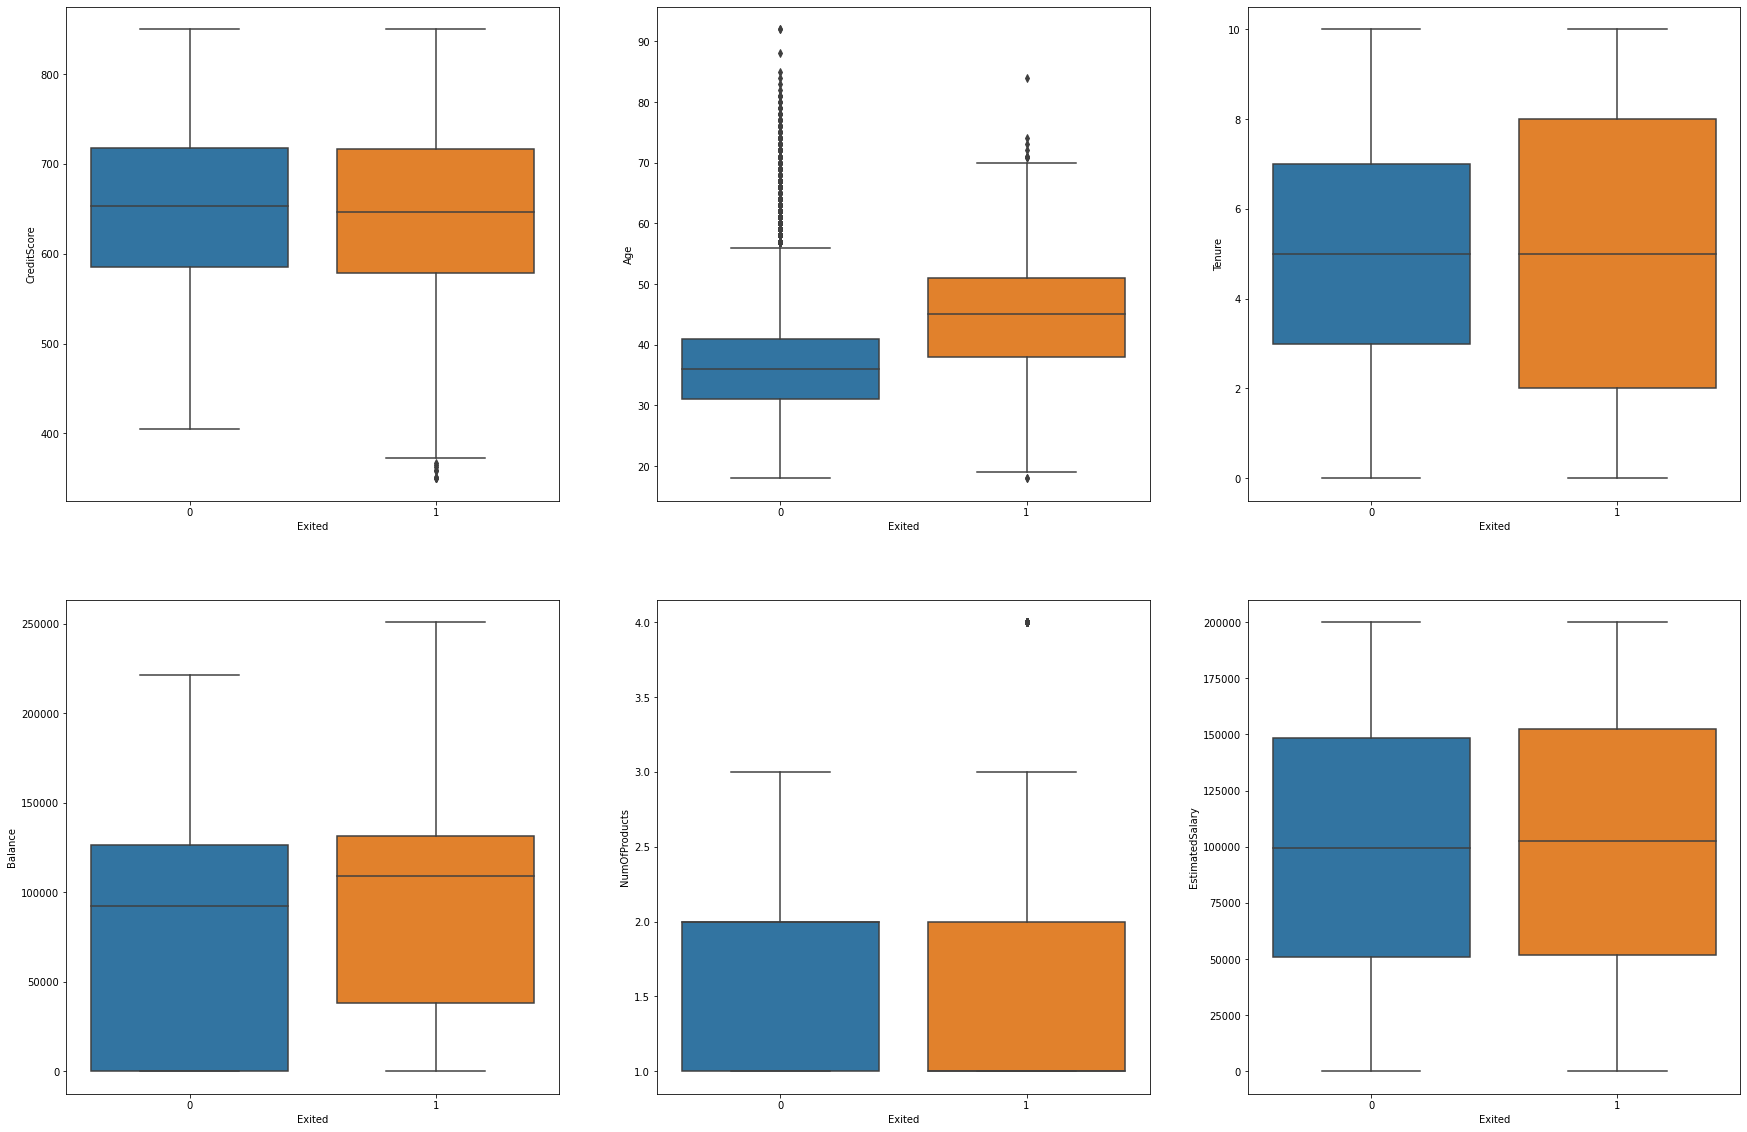

In [8]:
# dual-axis box-plot for label, 'Exited' with other continuous features
plt.figure(figsize = (30, 20))

plt.subplot(2, 3, 1)
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df)

plt.subplot(2, 3, 2)
sns.boxplot(x = 'Exited', y = 'Age', data = df)

plt.subplot(2, 3, 3)
sns.boxplot(x = 'Exited', y = 'Tenure', data = df)

plt.subplot(2, 3, 4)
sns.boxplot(x = 'Exited', y = 'Balance', data = df)

plt.subplot(2, 3, 5)
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = df)

plt.subplot(2, 3, 6)
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df)

plt.show()

In [9]:
# creating dummy variables for the categorical features
df_categorical = X.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
X = X.drop(list(df_categorical.columns), axis=1)
X = pd.concat([X, df_dummies], axis=1)

In [10]:
# 80-20 split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=201)

In [11]:
# Model instantiation with 10 decision trees and training
model = RandomForestClassifier(n_estimators = 10, random_state = 42).fit(X_train, y_train)

In [12]:
# getting the test predictions, test probabilities and test auc score
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

test_auc = roc_auc

In [13]:
# getting the Test Accuracy and Test AUC Score
print("Test Accuracy: ", test_accuracy)
print("Test AUC: ", test_auc)

Test Accuracy:  0.842
Test AUC:  0.8183671603172675


In [14]:
# Getting the Test Precicion, Recall, F1-Score and Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2*precision*recall)/(precision+recall)

print('Testing Precision: ', precision)
print('Testing Recall: ', recall)
print('Testing F1-Score: ', f1)
print('Testing Confusion Matrix: ')
print(confusion)
print('\n')

Testing Precision:  0.7114624505928854
Testing Recall:  0.425531914893617
Testing F1-Score:  0.5325443786982248
Testing Confusion Matrix: 
[[1504   73]
 [ 243  180]]




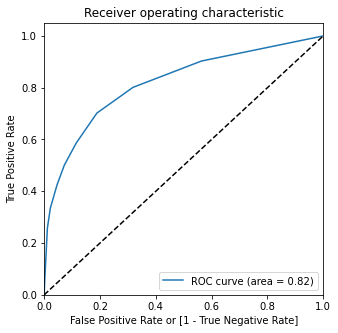

In [15]:
# displaying the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1],
                                         drop_intermediate = False)
auc_score = metrics.roc_auc_score(y_test, y_test_prob[:,1])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()